<a href="https://colab.research.google.com/github/ernesto-miguez/Machine-Learning-training/blob/master/Geospatial_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git


  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-3nswm7vl
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-3nswm7vl
     |████████████████████████████████| 14.7MB 321kB/s 
     |████████████████████████████████| 10.4MB 39.4MB/s 
  Created wheel for geopandas: filename=geopandas-0.7.0+21.gf70a669-py2.py3-none-any.whl size=938465 sha256=d2eb640c9bb52f0004eda117d257a2ec4a9dd04e4113fe73094e9f0447cebd47
  Stored in directory: /tmp/pip-ephem-wheel-cache-6u3j0cbi/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas


In [0]:
import geopandas as gpd
import pandas as pd
import numpy as np
import folium
from folium import  Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

## 1. Plotting maps

In [0]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

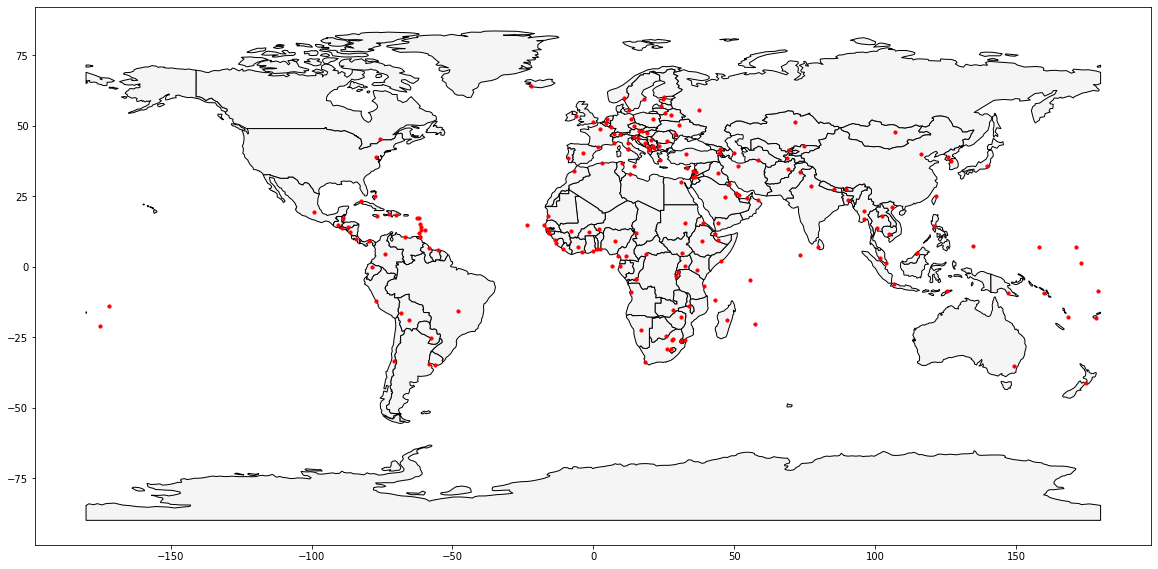

In [0]:
ax = world.plot(figsize = (20,20), color='whitesmoke', linestyle='-', edgecolor='black')
cities.plot(ax=ax, markersize=10, color='red')

In [0]:
full_data =  gpd.read_file('../DEClands.shp')

In [0]:
full_data = full_data.sort_values(by="OBJECTID")

In [0]:
data = full_data.loc[:, ['CLASS', 'COUNTY', 'geometry']].copy()

In [0]:
data.CLASS.value_counts()

WILD FOREST                   963
INTENSIVE USE                 107
PRIMITIVE                      63
WILDERNESS                     52
UNCLASSIFIED                   13
HISTORIC                        5
PRIMITIVE BICYCLE CORRIDOR      4
CANOE AREA                      1
Name: CLASS, dtype: int64

In [0]:
wild_lands = data.loc[data.CLASS.isin(['WILD FOREST', 'WILDERNESS'])].copy()
wild_lands.head()

,CLASS,COUNTY,geometry
1657,WILD FOREST,DELAWARE,"POLYGON ((486093.245 4635308.586, 486787.235 4..."
1658,WILD FOREST,DELAWARE,"POLYGON ((491931.514 4637416.256, 491305.424 4..."
1659,WILD FOREST,DELAWARE,"POLYGON ((486000.287 4635834.453, 485007.550 4..."
1660,WILD FOREST,GREENE,"POLYGON ((541716.775 4675243.268, 541217.579 4..."
1661,WILD FOREST,DELAWARE,"POLYGON ((487253.577 4641356.293, 486541.193 4..."


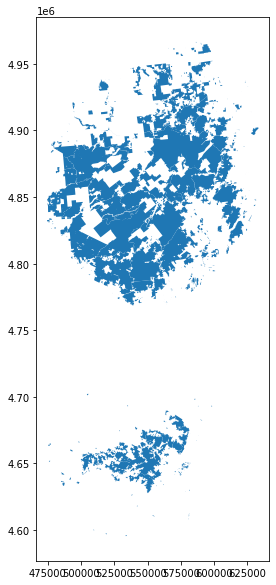

In [0]:
wild_lands.plot(figsize=(10,10))

In [0]:
wild_lands.geometry.head()

1657    POLYGON ((486093.245 4635308.586, 486787.235 4...
1658    POLYGON ((491931.514 4637416.256, 491305.424 4...
1659    POLYGON ((486000.287 4635834.453, 485007.550 4...
1660    POLYGON ((541716.775 4675243.268, 541217.579 4...
1661    POLYGON ((487253.577 4641356.293, 486541.193 4...
Name: geometry, dtype: geometry

## 2. Setting the Coordinate Reference System (CRS)

In [0]:
regions =  gpd.read_file('../Map_of_Regions_in_Ghana.shp')
regions.head()

,Region,geometry
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84..."
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96..."
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69..."
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79..."
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67..."


In [0]:
print(regions.crs)

epsg:32630


In [0]:
# Create a DataFrame with health facilities in Ghana
facilities_df = pd.read_csv("..//health-facilities-gh.csv")

# Convert the DataFrame to a GeoDataFrame
facilities = gpd.GeoDataFrame(facilities_df, geometry=gpd.points_from_xy(facilities_df.Longitude, facilities_df.Latitude))

# Set the coordinate reference system (CRS) to EPSG 4326
facilities.crs = {'init': 'epsg:4326'}

# View the first five rows of the GeoDataFrame
facilities.head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)


## Re-projecting

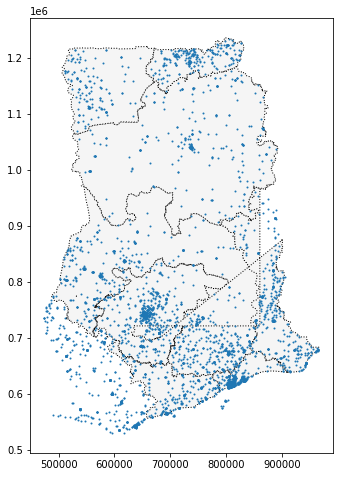

In [0]:
# Create a map
ax = regions.plot(figsize = (8,8), color='whitesmoke', linestyle=':', edgecolor='black')
facilities.to_crs(epsg=32630).plot(markersize=1, ax=ax) 

In [0]:
# The to_crs() method modifies only the geometry column
facilities.to_crs(epsg=32630).head()

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (614422.662 818986.851)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (656373.863 714616.547)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (682573.395 688243.477)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (653484.490 756478.812)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (653484.490 756478.812)


In [0]:
# Get the x-coordinate of each point
facilities.geometry.x.head()

0   -1.96317
1   -1.58592
2   -1.34982
3   -1.61098
4   -1.61098
dtype: float64

In [0]:
# Calculate the area (in square meters) of each polygon in the GeoDataFrame

regions.loc[:,"AREA"] = regions.geometry.area / 10**6

print("Area of Ghana: {} square kilometres".format(regions.AREA.sum()))
print("CRS:", regions.crs)
regions.head()

Area of Ghana: 219203.53120638436 square kilometres
CRS: epsg:32630


,Region,geometry,AREA
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84...",24379.017777
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96...",40098.168231
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69...",9665.626760
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79...",18987.625847
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67...",3706.511145


## 3. Interactive Maps

In [0]:
# Create a map
m_1 = folium.Map(location=[42.32,-71.0589], tiles='openstreetmap', zoom_start=10)

# Display the map
m_1

In [0]:
crimes = gpd.read_file('..//crime.csv')

In [0]:
crimes['OFFENSE_CODE_GROUP'].values

array(['Disorderly Conduct', 'Property Lost', 'Other', ...,
       'Warrant Arrests', 'Warrant Arrests', 'Warrant Arrests'],
      dtype=object)

In [0]:
crimes['HOUR']=crimes['HOUR'].astype(float)

In [0]:
daytime_robberies = crimes[(crimes.OFFENSE_CODE_GROUP == "Disorderly Conduct") & (crimes.HOUR.isin(range(9,12)))]

In [0]:
daytime_robberies.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,geometry
179,I182079857,02405,Disorderly Conduct,DISORDERLY CONDUCT,C6,958,,2018-10-03 10:52:00,2018,10,Wednesday,10.0,Part Two,BELLFLOWER ST,42.32445145,-71.05810680,"(42.32445145, -71.05810680)",None
1782,I182078108,02401,Disorderly Conduct,AFFRAY,C6,256,,2018-09-27 09:00:00,2018,9,Thursday,9.0,Part Two,MOUNT VERNON ST,42.31779354,-71.04210959,"(42.31779354, -71.04210959)",None
3177,I182076630,02405,Disorderly Conduct,DISORDERLY CONDUCT,A1,103,,2018-09-22 11:42:00,2018,9,Saturday,11.0,Part Two,SCHOOL ST,42.35754620,-71.05881953,"(42.35754620, -71.05881953)",None
3506,I182076256,02405,Disorderly Conduct,DISORDERLY CONDUCT,D4,152,,2018-09-21 10:00:00,2018,9,Friday,10.0,Part Two,WARREN AVE,42.34453911,-71.07358770,"(42.34453911, -71.07358770)",None
4146,I182075606,02405,Disorderly Conduct,DISORDERLY CONDUCT,E18,521,,2018-09-19 10:50:00,2018,9,Wednesday,10.0,Part Two,HYDE PARK AVE,42.25546877,-71.12417959,"(42.25546877, -71.12417959)",None


In [0]:
daytime_robberies.shape

(315, 18)

In [0]:
import sys
sys.setrecursionlimit(10**3)

In [0]:
# Create a map 
m_2 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
for idx, row in daytime_robberies.iterrows():
  Marker([row['Lat'], row['Long']]).add_to(m_2)

# Display the map
m_2

RecursionError: ignored

In [0]:
import math
# Create the map
m_3 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
mc = MarkerCluster()
for idx, row in daytime_robberies.iterrows():
  if not math.isnan(row['Long']) and not math.isnan(row['Lat']):
    mc.add_child(Marker([row['Lat'], row['Long']]))

m_3.add_child(mc)

# Display the map
m_3

TypeError: ignored

In [0]:
m_5 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

# Add a heatmap to the base map
HeatMap(data=crimes[['Lat', 'Long']], radius=10).add_to(m_5)

# Display the map
m_5

## 4. Geocoding

In [0]:
from geopandas.tools import geocode

In [7]:
result = geocode("The Great Pyramid of Giza", provider="nominatim")
result

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


,geometry,address
0,POINT (31.13424 29.97913),"هرم خوفو, Cause way, كوم الأخضر, الجيزة, محافظ..."


In [10]:
point = result.geometry.iloc[0]
print("Latitude:", point.y)
print("Longitude:", point.x)

Latitude: 29.9791264
Longitude: 31.13423837510151


In [12]:
print(point)

POINT (31.13423837510151 29.9791264)


In [15]:
universities = pd.read_csv("../top_universities.csv")
universities.head()

,Rank,Name,Country
0,4,University of Oxford,United Kingdom
1,6,ETH Zurich - Swiss Federal Institute of Techno...,Switzerland
2,7,University of Cambridge,United Kingdom
3,8,UCL,United Kingdom
4,9,Imperial College London,United Kingdom


In [17]:
# Use a lambda function to apply the geocoder to every row in the DataFrame

def my_geocoder(row):
  try:
    point = geocode(row, provider='nominatim').geometry.iloc[0]
    return pd.Series({'Latitude': point.y, 'Longitude': point.x, 'geometry': point})
  except:
    return None


universities[['Latitude', 'Longitude', 'geometry']] = universities.apply(lambda x: my_geocoder(x['Name']), axis=1)

print("{}% of addresses were geocoded!".format(
    (1 - sum(np.isnan(universities['Latitude'])) / len(universities)) * 100))

# Drop universities that were not succesfully geocoded
universities = universities.loc[~np.isnan(universities['Latitude'])]
universities = gpd.GeoDataFrame(universities, geometry = universities.geometry)
universities.crs = {'init': 'epsg:4326'}
universities.head()

/usr/local/lib/python3.6/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


86.0% of addresses were geocoded!


/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,Rank,Name,Country,Latitude,Longitude,geometry
0,4,University of Oxford,United Kingdom,51.758708,-1.255668,POINT (-1.25567 51.75871)
2,7,University of Cambridge,United Kingdom,52.199852,0.119739,POINT (0.11974 52.19985)
3,8,UCL,United Kingdom,51.524443,-0.133517,POINT (-0.13352 51.52444)
4,9,Imperial College London,United Kingdom,51.498871,-0.175608,POINT (-0.17561 51.49887)
5,18,EPFL - Ecole Polytechnique Federale de Lausanne,Switzerland,46.518659,6.566562,POINT (6.56656 46.51866)


In [20]:
# Create a map 
m = folium.Map(location=[54,15], tiles='openstreetmap', zoom_start=2)

# Add points to the map
for idx, row in universities.iterrows():
  Marker([row['Latitude'], row['Longitude']], popup=row['Name']).add_to(m)

# Display the map
m

## 5. Proximity analysis

In [4]:
releases = gpd.read_file('../toxic_release_pennsylvania.shp')
releases.head()

,YEAR,CITY,COUNTY,ST,LATITUDE,LONGITUDE,CHEMICAL,UNIT_OF_ME,TOTAL_RELE,geometry
0,2016,PHILADELPHIA,PHILADELPHIA,PA,40.005901,-75.072103,FORMIC ACID,Pounds,0.160,POINT (2718560.227 256380.179)
1,2016,PHILADELPHIA,PHILADELPHIA,PA,39.920120,-75.146410,ETHYLENE GLYCOL,Pounds,13353.480,POINT (2698674.606 224522.905)
2,2016,PHILADELPHIA,PHILADELPHIA,PA,40.023880,-75.220450,CERTAIN GLYCOL ETHERS,Pounds,104.135,POINT (2676833.394 261701.856)
3,2016,PHILADELPHIA,PHILADELPHIA,PA,39.913540,-75.198890,LEAD COMPOUNDS,Pounds,1730.280,POINT (2684030.004 221697.388)
4,2016,PHILADELPHIA,PHILADELPHIA,PA,39.913540,-75.198890,BENZENE,Pounds,39863.290,POINT (2684030.004 221697.388)


In [5]:
stations = gpd.read_file('../PhillyHealth_Air_Monitoring_Stations.shp')
stations.head()

,SITE_NAME,ADDRESS,BLACK_CARB,ULTRAFINE_,CO,SO2,OZONE,NO2,NOY_NO,PM10,PM2_5,SPECIATED_,PM_COURSE,CARBONYLS,PAMS_VOC,TSP_11101,TSP_METALS,TSP_LEAD,TOXICS_TO1,MET,COMMUNITY_,LATITUDE,LONGITUDE,geometry
0,LAB,1501 East Lycoming Avenue,N,N,Y,N,Y,Y,Y,N,Y,N,N,Y,Y,N,Y,N,y,N,N,40.008606,-75.097624,POINT (2711384.641 257149.310)
1,ROX,Eva and Dearnley Streets,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,N,Y,N,N,40.050461,-75.236966,POINT (2671934.290 271248.900)
2,NEA,Grant Avenue and Ashton Street,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,40.072073,-75.013128,POINT (2734326.638 280980.247)
3,CHS,500 South Broad Street,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,Y,N,Y,N,N,39.944510,-75.165442,POINT (2693078.580 233247.101)
4,NEW,2861 Lewis Street,N,N,Y,Y,Y,N,Y,Y,Y,Y,Y,N,N,Y,N,Y,N,Y,N,39.991688,-75.080378,POINT (2716399.773 251134.976)


## Measuring distance

In [6]:
print(stations.crs)
print(releases.crs)

epsg:2272
epsg:2272


In [7]:
# Select one release incident in particular
recent_release = releases.iloc[360]

# Measure distance from release to each station
distances = stations.geometry.distance(recent_release.geometry)
distances

0     44778.509761
1     51006.456589
2     77744.509207
3     14672.170878
4     43753.554393
5      4711.658655
6     23197.430858
7     12072.823097
8     79081.825506
9      3780.623591
10    27577.474903
11    19818.381002
dtype: float64

In [8]:
print("Mean distance to monitoring stations: {} feet".format(distances.mean()))

Mean distance to monitoring stations: 33516.28487007786 feet


In [9]:
print("Closest monitoring station ({} feet)".format(distances.min()))
print(stations.iloc[distances.idxmin()][['ADDRESS', 'LATITUDE', 'LONGITUDE']])

Closest monitoring station (3780.623590556444 feet)
ADDRESS      3100 Penrose Ferry Road
LATITUDE                     39.9128
LONGITUDE                   -75.1854
Name: 9, dtype: object


## Creating a buffer

In [11]:
two_mile_buffer = stations.geometry.buffer(2 * 5280)
two_mile_buffer.head()

0    POLYGON ((2721944.641 257149.310, 2721893.792 ...
1    POLYGON ((2682494.290 271248.900, 2682443.441 ...
2    POLYGON ((2744886.638 280980.247, 2744835.789 ...
3    POLYGON ((2703638.580 233247.101, 2703587.731 ...
4    POLYGON ((2726959.773 251134.976, 2726908.924 ...
dtype: geometry

In [12]:
# Create a map with release incidents and monitoring stations
m = folium.Map(location=[39.9526,-75.1652], zoom_start=11)
HeatMap(data=releases[['LATITUDE', 'LONGITUDE']], radius=15).add_to(m)
for idx, row in stations.iterrows():
  Marker([row['LATITUDE'], row['LONGITUDE']]).add_to(m)

# Plot each polygon on the map
folium.GeoJson(two_mile_buffer.to_crs(epsg=4326)).add_to(m)

# Show the map
m

RecursionError: ignored

Type: <class 'shapely.geometry.multipolygon.MultiPolygon'>


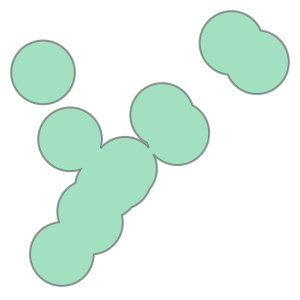

In [13]:
# Turn group of polygons into single multipolygon
my_union = two_mile_buffer.geometry.unary_union
print('Type:', type(my_union))

# Show the Multipolygon object
my_union

In [14]:
# The closest station is less than two miles away
my_union.contains(releases.iloc[360].geometry)

True

In [15]:
# The closest station is more than two miles away
my_union.contains(releases.iloc[358].geometry)

False